In [20]:
from voting_agents import Neural_Agent
from voting_agents import Agent
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt
from numba import jit

def moving_average(a, n=2):
    ret = np.cumsum(a, dtype=float)
    ret[n:] = ret[n:] - ret[:-n]
    return ret[n - 1:] / n

class DummyBandit:
    def __init__(self,N,win):
        self.N = N
        self.win = win
        self.loser_reward = 0.25
        self.nvot = 1
    def get_reward(self,action):
        if action == self.win:
            #print(self.win)
            return 1
        else:
            return self.loser_reward

bd = DummyBandit(5,3)

alph = 0.1

100%|██████████| 2000/2000 [00:00<00:00, 17926.52it/s]
Wall time: 3.39 s
Wall time: 117 ms


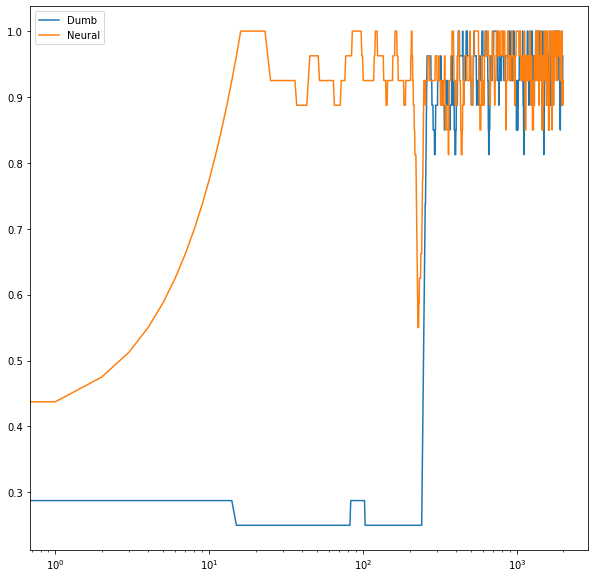

In [19]:
neural = Neural_Agent(bd,0.1,UI=2,alpha=0.1)
agent_t = Agent(bd,0.1,alph)

N_episodes = 2000

AP = 20

def eval(agent,bandit):
    reward_history = []
    for episode in tqdm(range(N_episodes)):
        action = agent.get_action(bandit, episode, None, N_episodes)
        reward = bandit.get_reward(action)

        agent.update_Q(action, reward)
        reward_history.append(reward)

        interval = int(N_episodes/10)

        #if episode % interval == 0:
        #    print(name, episode, round(float(np.mean(reward_history[-1*interval:])),3))
        
    return reward_history

%time neur = moving_average(eval(neural,bd),AP)
%time flat = moving_average(eval(agent_t,bd),AP)

base = np.arange(len(flat))
plt.figure(figsize=(10,10))
plt.plot(base,flat,label = 'Dumb')
plt.plot(base,neur,label = 'Neural')
plt.xscale('log')
plt.legend()
plt.show()

100%|██████████| 2000/2000 [00:00<00:00, 20368.71it/s]
Wall time: 3.37 s
Wall time: 103 ms


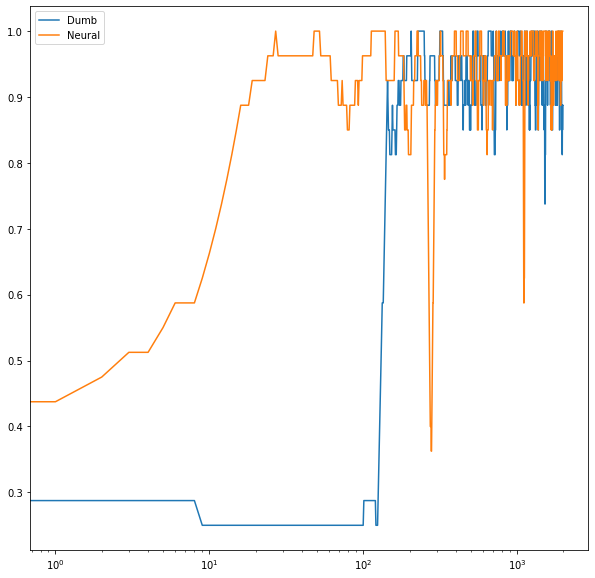

In [21]:
neural = Neural_Agent(bd,0.1,UI=2,alpha=0.1)
agent_t = Agent(bd,0.1,alph)

N_episodes = 2000

AP = 20

def eval(agent,bandit):
    reward_history = []
    for episode in tqdm(range(N_episodes)):
        action = agent.get_action(bandit, episode, None, N_episodes)
        reward = bandit.get_reward(action)

        agent.update_Q(action, reward)
        reward_history.append(reward)

        interval = int(N_episodes/10)

        #if episode % interval == 0:
        #    print(name, episode, round(float(np.mean(reward_history[-1*interval:])),3))
        
    return reward_history

%time neur = moving_average(eval(neural,bd),AP)
%time flat = moving_average(eval(agent_t,bd),AP)

base = np.arange(len(flat))
plt.figure(figsize=(10,10))
plt.plot(base,flat,label = 'Dumb')
plt.plot(base,neur,label = 'Neural')
plt.xscale('log')
plt.legend()
plt.show()